In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv('fraud_oracle.csv')





### 1. Data Understanding

In [2]:
# Display basic statistics of the dataset
print(data.describe())

# Check the first few rows of the dataset
print(data.head())

# Explore the data types and missing values
print(data.info())

        WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000 

The dataset consists of 15,420 instances and 33 variables, encompassing information related to vehicle insurance claims. A glimpse of the dataset reveals a mix of numerical and categorical features. The dependent variable, FraudFound_P, is binary, with 0 indicating no fraud found and 1 indicating fraud found. <br><br>
Descriptive Statistics for Numerical Variables:<br>
•	WeekOfMonth, WeekOfMonthClaimed, Age: These variables exhibit varying degrees of central tendency and dispersion. For instance, the average age is approximately 39.86, ranging from 0 to 80.<br>
•	PolicyNumber, RepNumber, Deductible, DriverRating, Year: These variables demonstrate diverse ranges, with Year spanning from 1994 to 1996.<br><br>
Categorical Variables:<br>
•	Month, DayOfWeek, Make, AccidentArea: These categorical features capture information such as the month of the accident, day of the week, make of the vehicle, and accident area.<br>
•	Sex, MaritalStatus, Fault, PolicyType: Demographic and policy-related details are encoded in these categorical variables.<br>
•	VehicleCategory, VehiclePrice, Days_Policy_Accident: Information about the vehicle, its category, price, and the number of days between policy issuance and the accident are included.<br><br>
Target Variable:<br>
•	The target variable, FraudFound_P, is crucial for fraud detection. The dataset exhibits a class imbalance, with instances of no fraud (0) significantly outnumbering instances of fraud (1).<br><br>
Data Types and Non-Null Counts:<br>
•	The dataset contains a mix of data types, including integers and objects (likely representing categorical variables).<br>
•	No missing values are observed, ensuring completeness in the dataset.


### 2. Data Cleaning and Preprocessing

#### Identify Missing Values

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64


In [4]:
print(data['FraudFound_P'].value_counts())

0    14497
1      923
Name: FraudFound_P, dtype: int64


In [5]:
# List of features to drop
features_to_drop = ['PolicyNumber', 'RepNumber', 'Month', 'WeekOfMonth', 'DayOfWeek', 'Year',
                    'Days_Policy_Accident', 'Days_Policy_Claim', 'WitnessPresent', 'PoliceReportFiled']

# Drop the specified features from the DataFrame
data_processed = data.drop(features_to_drop, axis=1)

# Display the updated DataFrame
print(data_processed.head())

     Make AccidentArea DayOfWeekClaimed MonthClaimed  WeekOfMonthClaimed  \
0   Honda        Urban          Tuesday          Jan                   1   
1   Honda        Urban           Monday          Jan                   4   
2   Honda        Urban         Thursday          Nov                   2   
3  Toyota        Rural           Friday          Jul                   1   
4   Honda        Urban          Tuesday          Feb                   2   

      Sex MaritalStatus  Age          Fault         PolicyType  ...  \
0  Female        Single   21  Policy Holder  Sport - Liability  ...   
1    Male        Single   34  Policy Holder  Sport - Collision  ...   
2    Male       Married   47  Policy Holder  Sport - Collision  ...   
3    Male       Married   65    Third Party  Sedan - Liability  ...   
4  Female        Single   27    Third Party  Sport - Collision  ...   

  Deductible DriverRating  PastNumberOfClaims  AgeOfVehicle  \
0        300            1                none       3

#### Dealing with Outliers

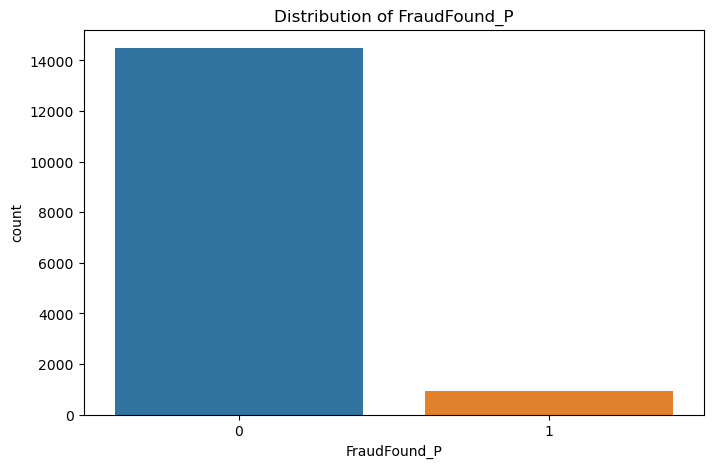

<Figure size 1500x1000 with 0 Axes>

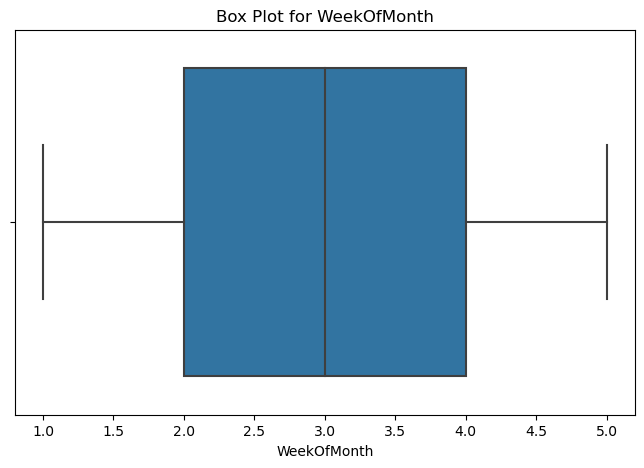

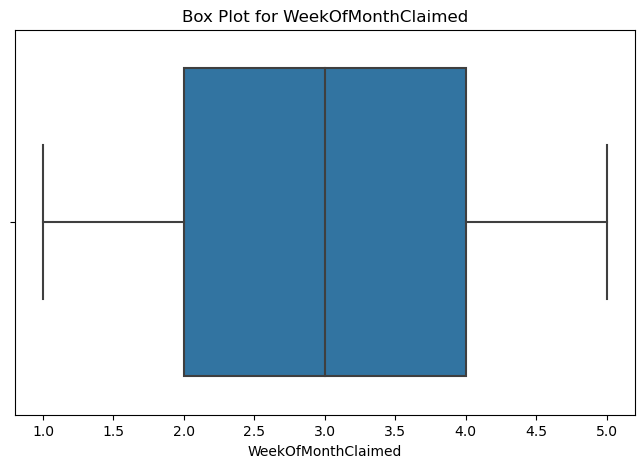

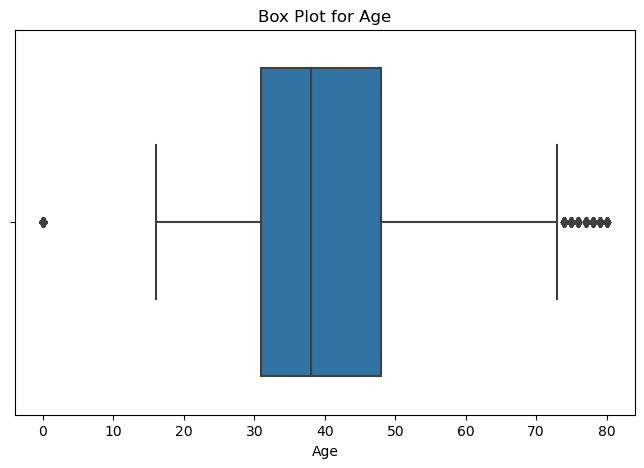

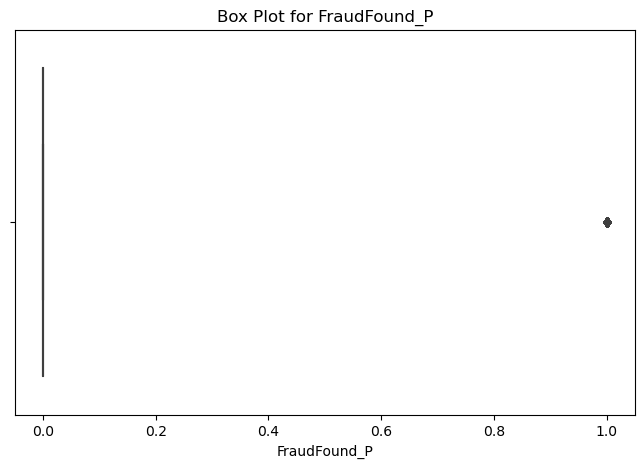

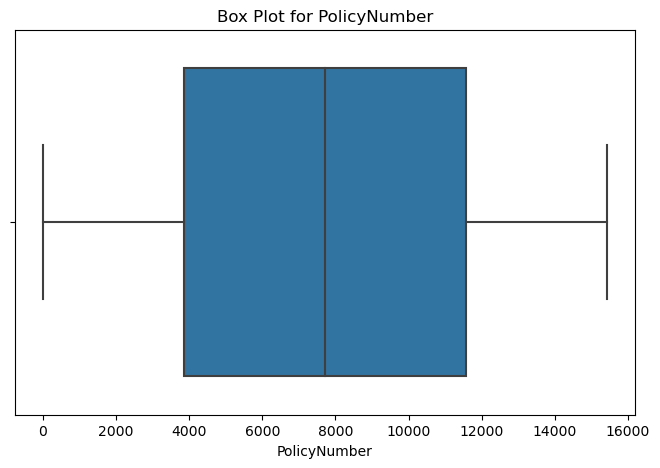

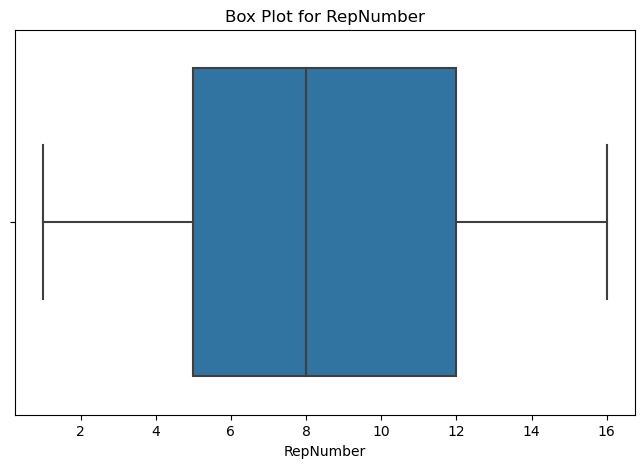

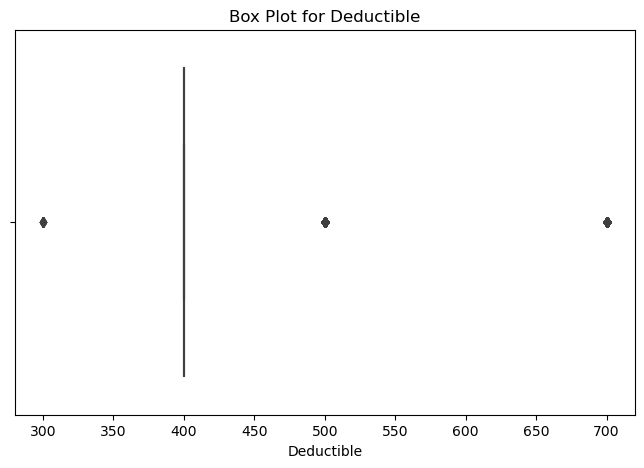

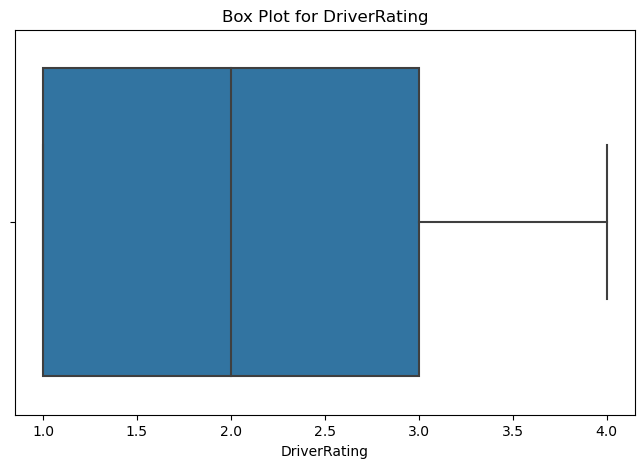

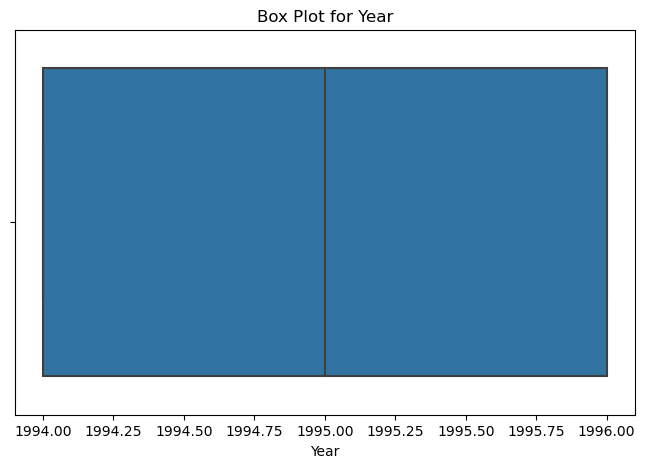

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'FraudFound_P'
plt.figure(figsize=(8, 5))
sns.countplot(x='FraudFound_P', data=data_processed)
plt.title('Distribution of FraudFound_P')
plt.show()

# Select numerical columns excluding 'FraudFound_P'
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Visualize boxplots for numerical columns
plt.figure(figsize=(15, 10))

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [7]:
print(data_processed['FraudFound_P'].value_counts())

0    14497
1      923
Name: FraudFound_P, dtype: int64


<Figure size 1500x1000 with 0 Axes>

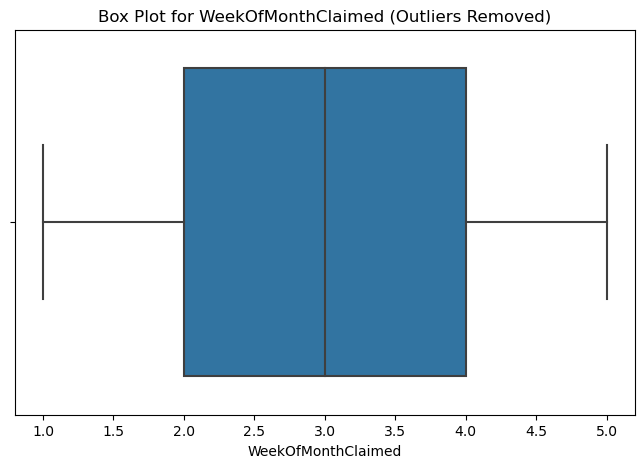

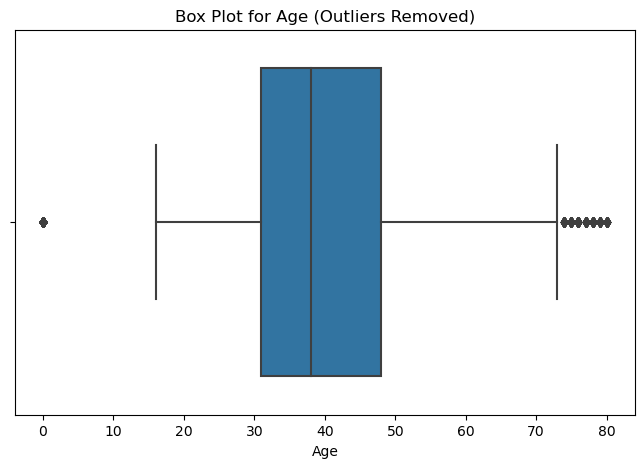

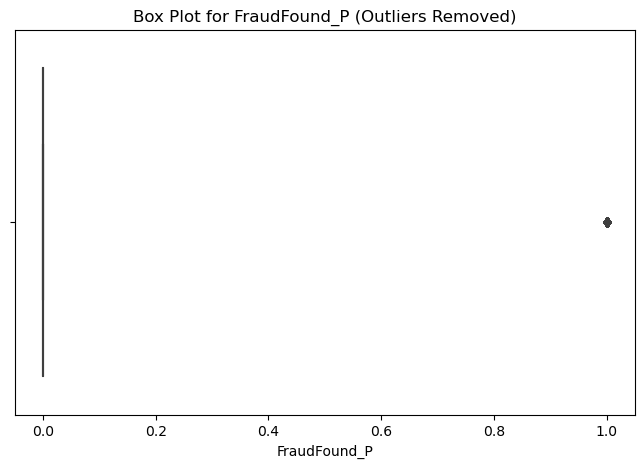

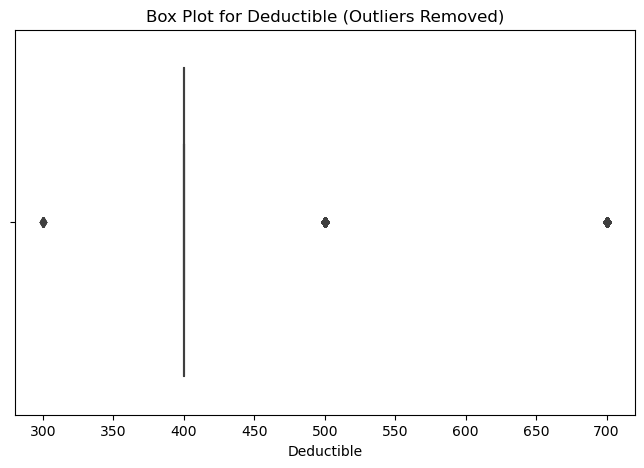

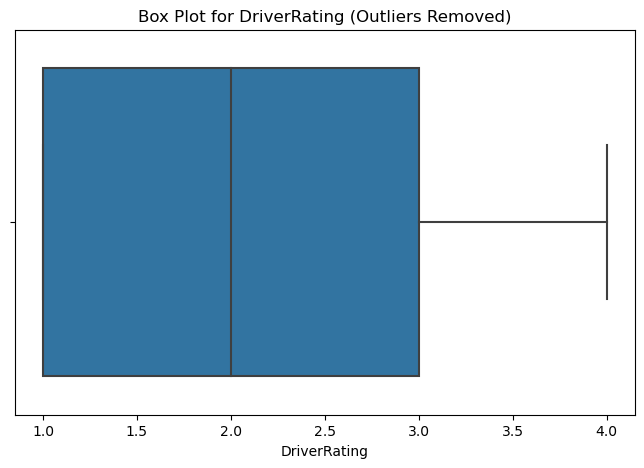

In [8]:

numerical_columns = data_processed.select_dtypes(include=['int64', 'float64']).columns

# Visualize box plots for each numerical column
plt.figure(figsize=(15, 10))

for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column} (Outliers Removed)')
    plt.show()

#### Handling Outliers

 IQR (Interquartile Range) method to identify and remove outliers

<Figure size 1500x1000 with 0 Axes>

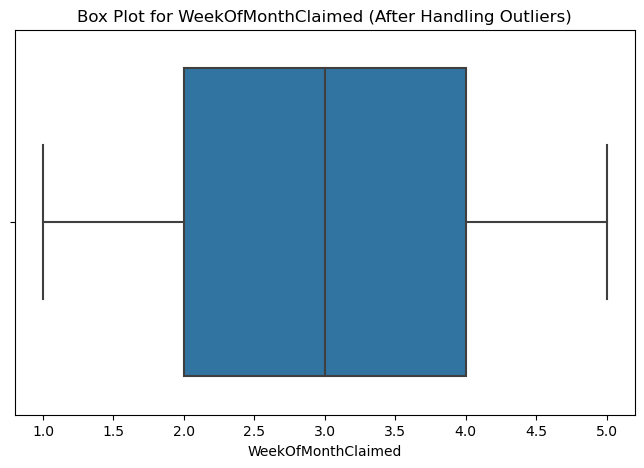

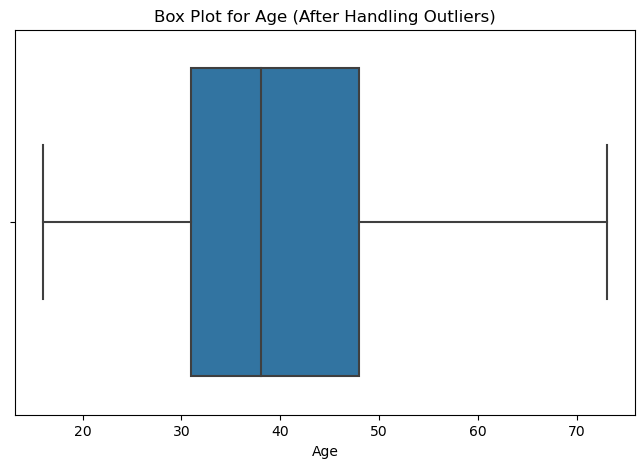

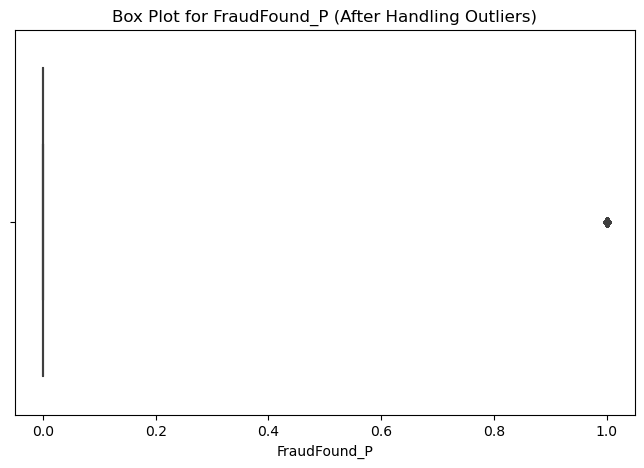

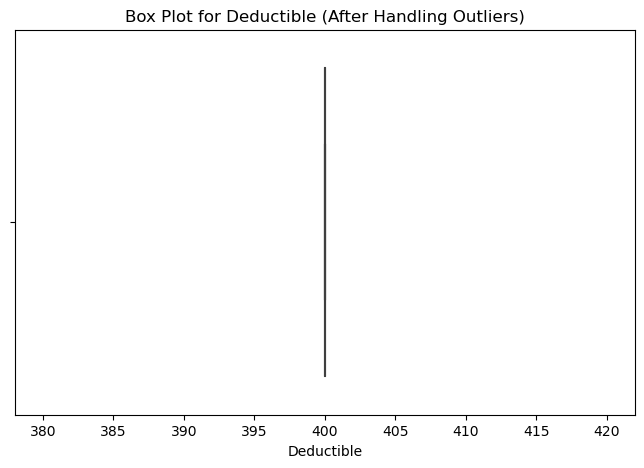

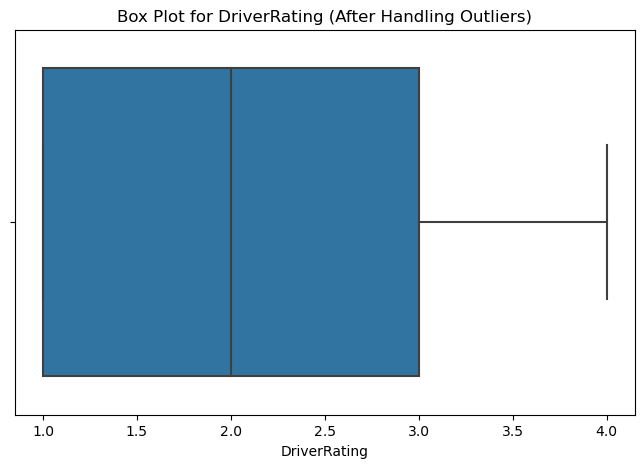

In [9]:
# Remove outliers using IQR (Interquartile Range)
for column in numerical_columns:
    if column != 'FraudFound_P':
        Q1 = data_processed[column].quantile(0.25)
        Q3 = data_processed[column].quantile(0.75)
        IQR = Q3 - Q1
        data = data[~((data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR)))]

# Visualize box plots after handling outliers
plt.figure(figsize=(15, 10))
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column} (After Handling Outliers)')
    plt.show()

#### Convert categorical variables into a numerical

In [10]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Make', 'AccidentArea', 'DayOfWeekClaimed',
                        'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
                        'VehicleCategory', 'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle',
                        'AgeOfPolicyHolder', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
                        'NumberOfCars', 'BasePolicy']

label_encoder = LabelEncoder()

for column in categorical_columns:
    data_processed[column] = label_encoder.fit_transform(data_processed[column])

In [11]:
print(data_processed.head())

   Make  AccidentArea  DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  \
0     6             1                 6             5                   1   
1     6             1                 2             5                   4   
2     6             1                 5            10                   2   
3    17             0                 1             6                   1   
4     6             1                 6             4                   2   

   Sex  MaritalStatus  Age  Fault  PolicyType  ...  Deductible  DriverRating  \
0    0              2   21      0           5  ...         300             1   
1    1              2   34      0           4  ...         400             4   
2    1              1   47      0           4  ...         400             3   
3    1              1   65      1           2  ...         400             2   
4    0              2   27      1           4  ...         400             1   

   PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  

In [12]:
print(data_processed['FraudFound_P'].value_counts())


0    14497
1      923
Name: FraudFound_P, dtype: int64


### 3.	Exploratory Data Analysis (EDA)

####  Distribution of the target variable FraudFound_P

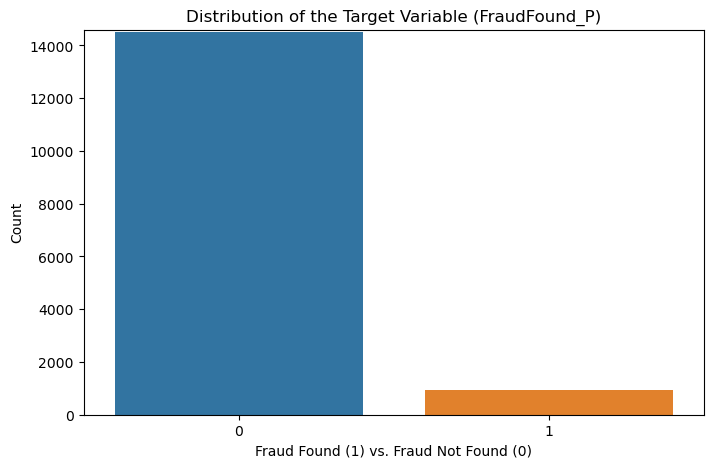

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x='FraudFound_P', data=data_processed)
plt.title('Distribution of the Target Variable (FraudFound_P)')
plt.xlabel('Fraud Found (1) vs. Fraud Not Found (0)')
plt.ylabel('Count')

# Set y-axis limit to ensure visibility of the count of '1'
plt.ylim(0, max(data_processed['FraudFound_P'].value_counts()) + 100)

plt.show()

#### Relationships between features and FraudFound_P

Correlation Analysis



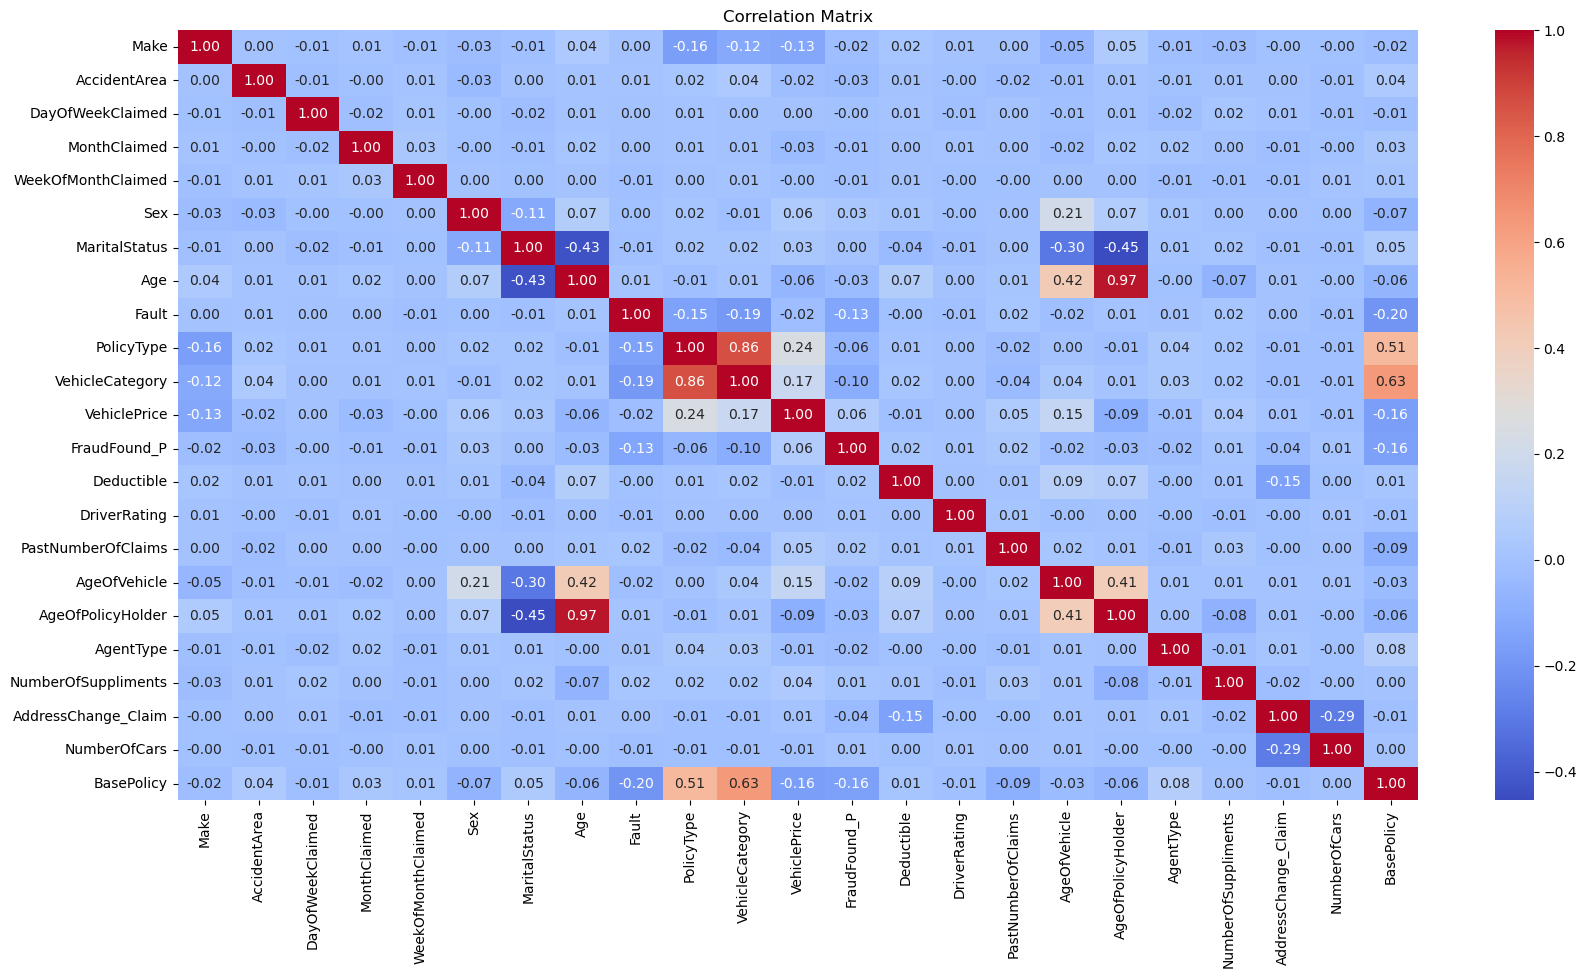

In [14]:
corr_matrix = data_processed.corr()

# Increase the figure size
plt.figure(figsize=(20, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

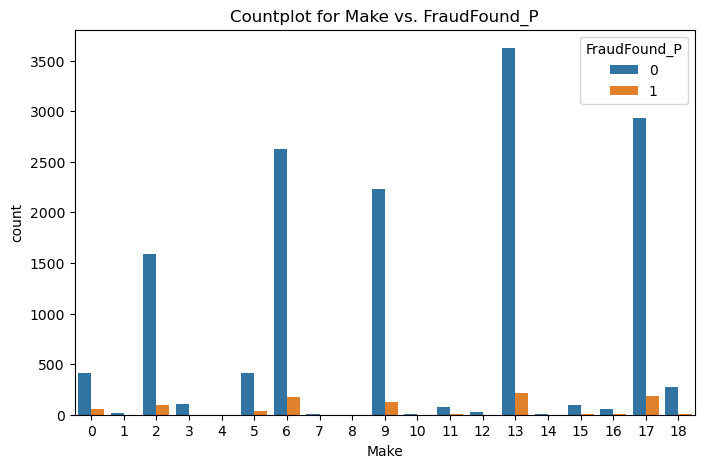

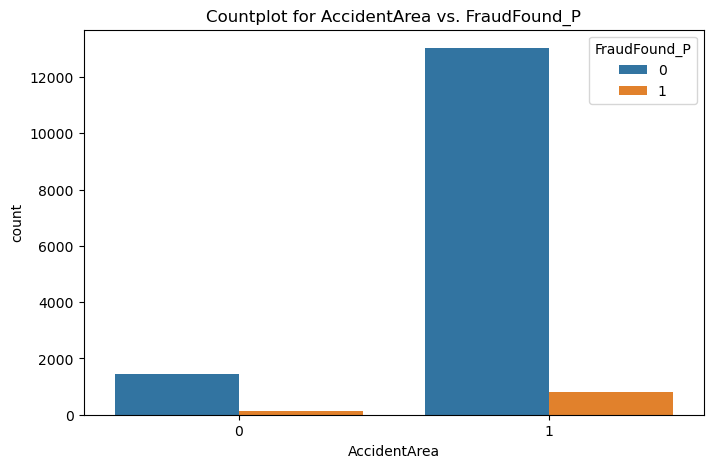

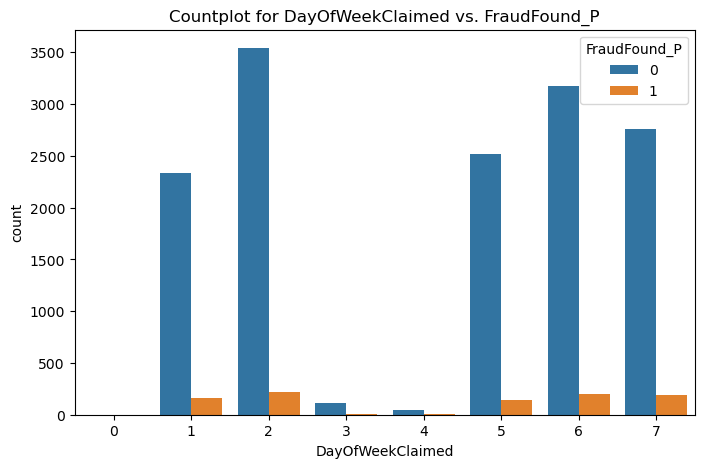

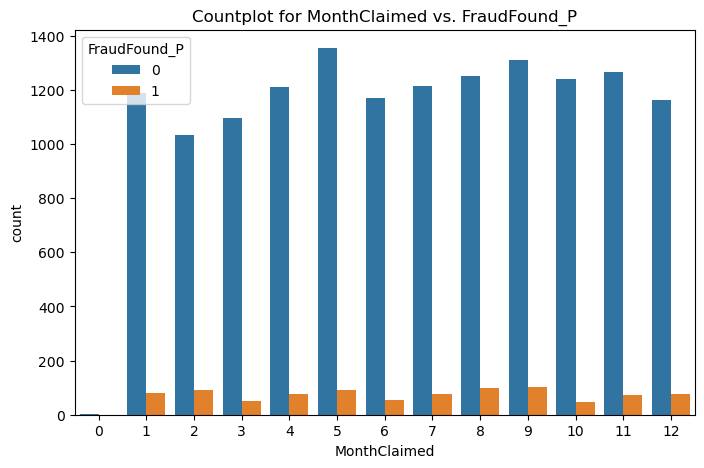

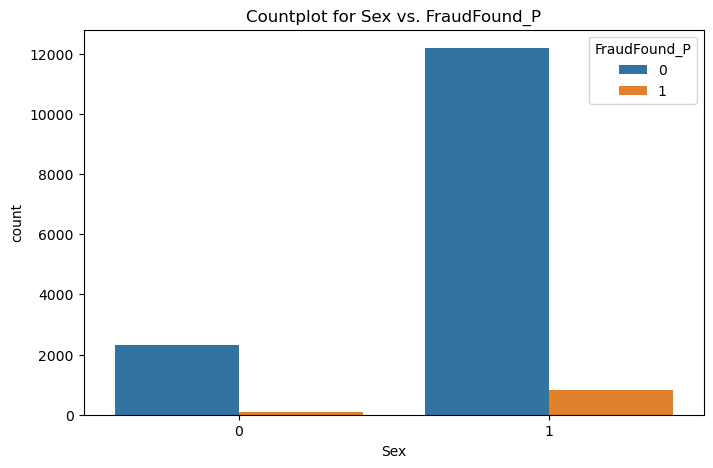

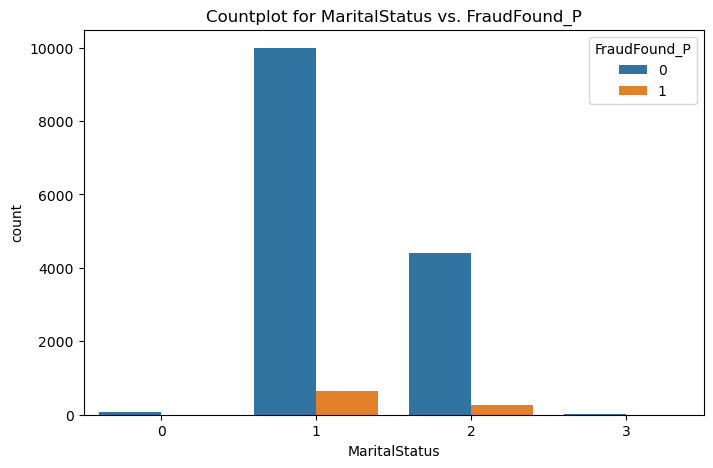

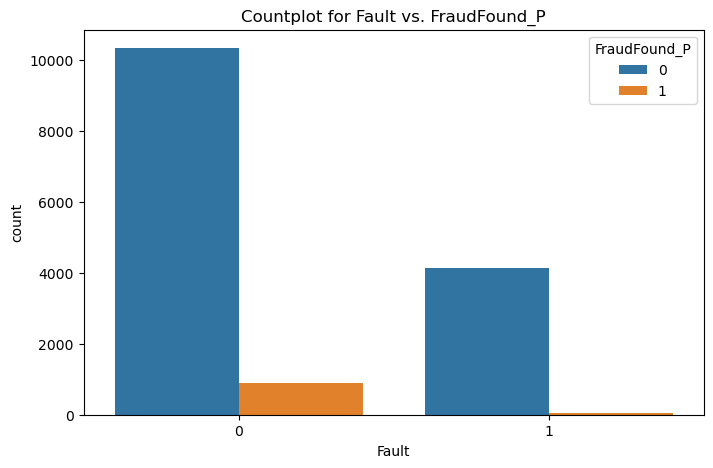

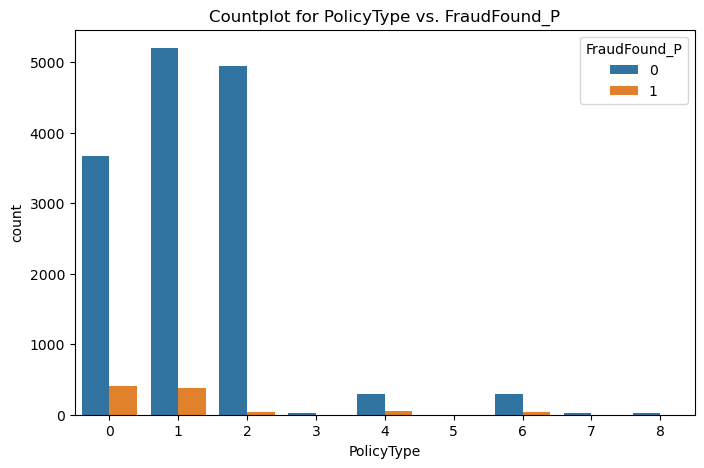

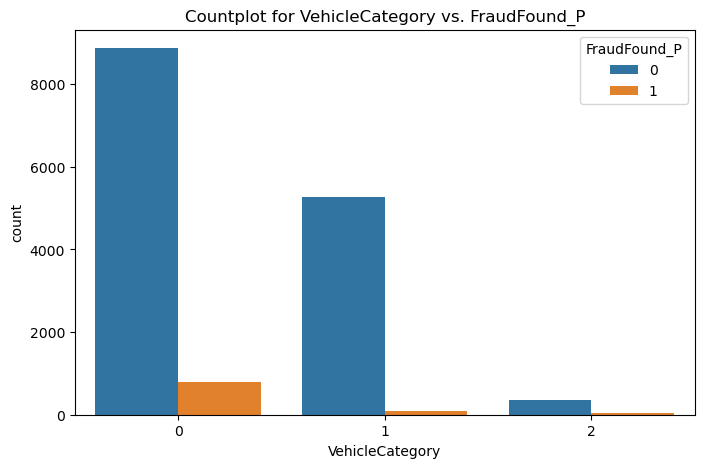

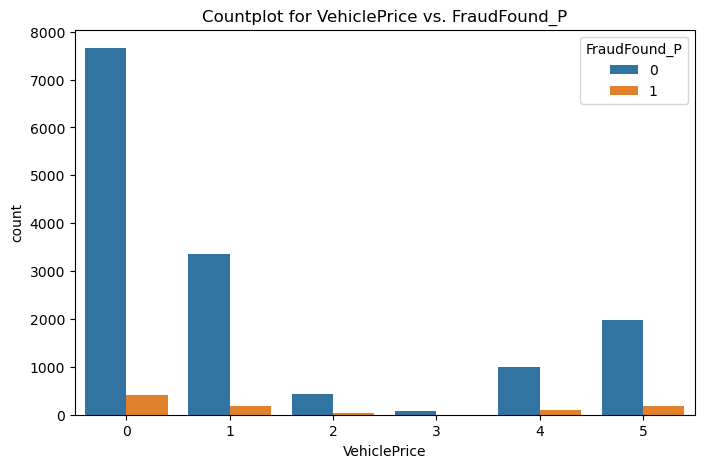

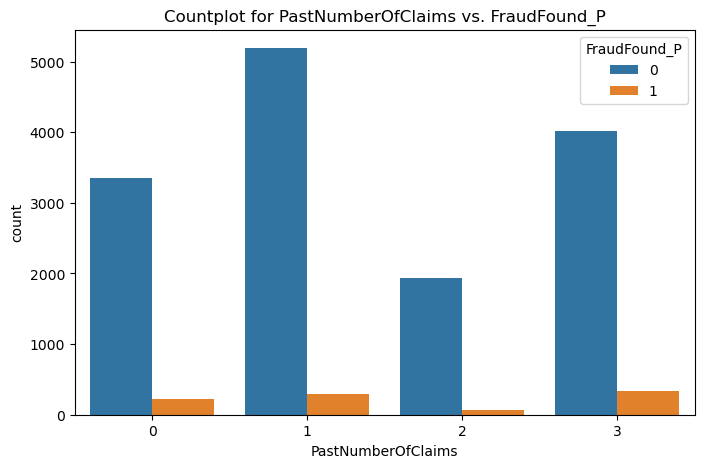

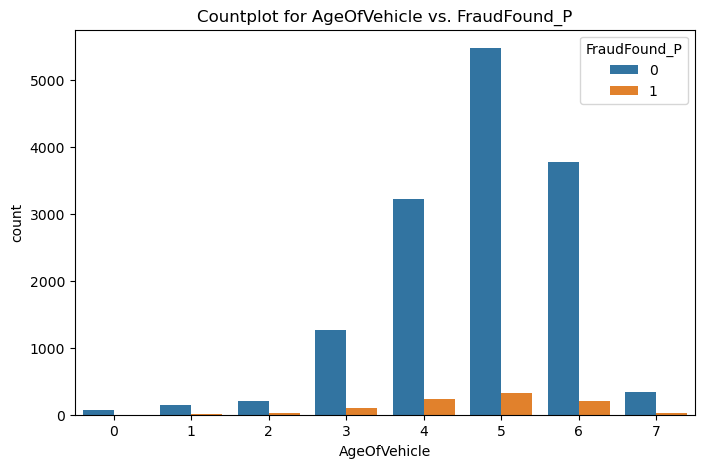

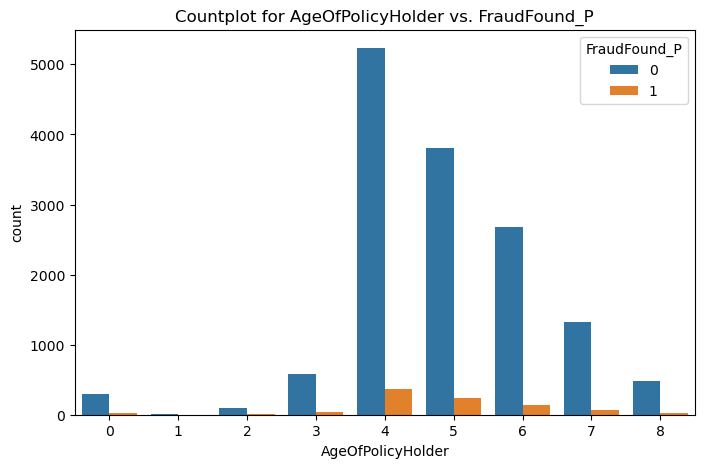

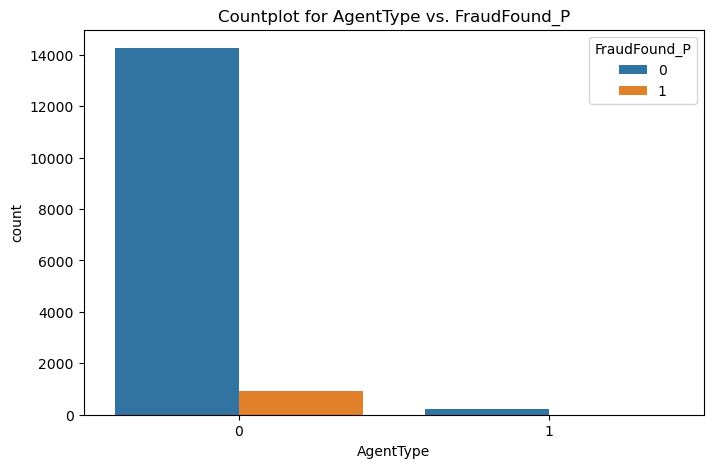

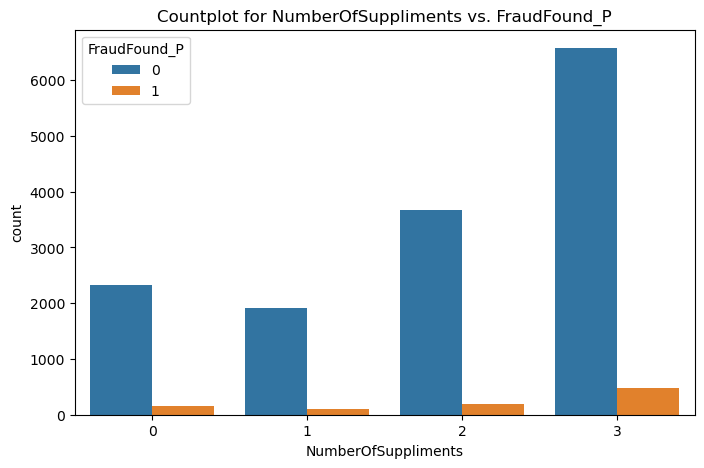

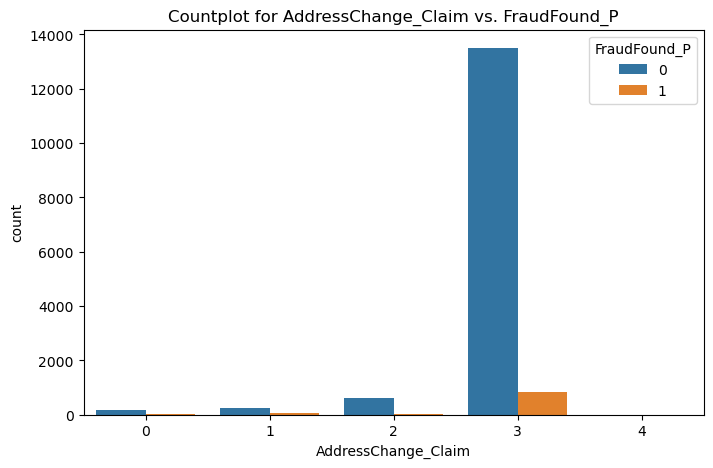

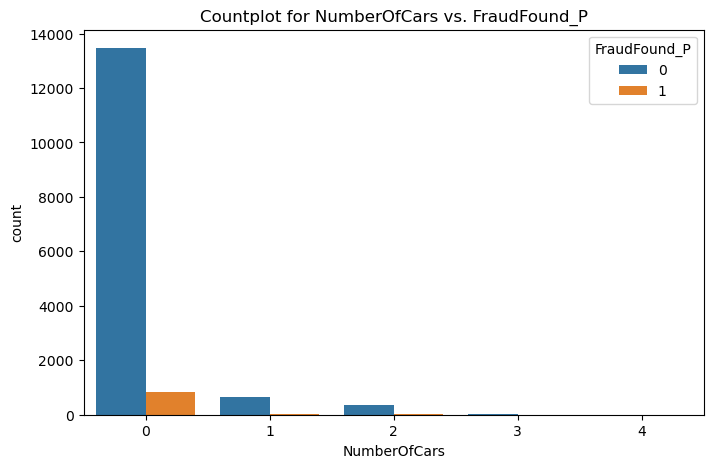

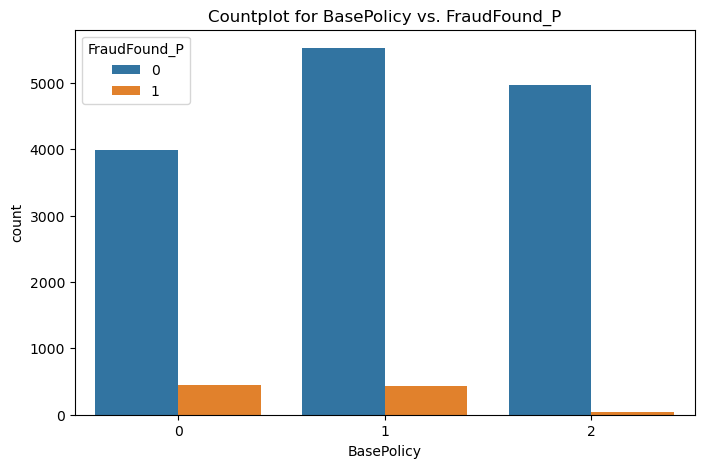

In [15]:
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, hue='FraudFound_P', data=data_processed)
    plt.title(f'Countplot for {column} vs. FraudFound_P')
    plt.show()

### 4.	Feature Engineering

In [16]:
print(data_processed.head())

   Make  AccidentArea  DayOfWeekClaimed  MonthClaimed  WeekOfMonthClaimed  \
0     6             1                 6             5                   1   
1     6             1                 2             5                   4   
2     6             1                 5            10                   2   
3    17             0                 1             6                   1   
4     6             1                 6             4                   2   

   Sex  MaritalStatus  Age  Fault  PolicyType  ...  Deductible  DriverRating  \
0    0              2   21      0           5  ...         300             1   
1    1              2   34      0           4  ...         400             4   
2    1              1   47      0           4  ...         400             3   
3    1              1   65      1           2  ...         400             2   
4    0              2   27      1           4  ...         400             1   

   PastNumberOfClaims  AgeOfVehicle  AgeOfPolicyHolder  

In [17]:
print(data_processed['FraudFound_P'].value_counts())


0    14497
1      923
Name: FraudFound_P, dtype: int64


### 4. Handling Imbalanced Data

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming 'data_processed' is your DataFrame with features and target variable
X = data_processed.drop('FraudFound_P', axis=1)
y = data_processed['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the oversampled data


In [26]:
# Check the shape of the original and resampled datasets
print("Original Training Data - Class 0:", sum(y_train == 0), "Class 1:", sum(y_train == 1))
print("Resampled Training Data - Class 0:", sum(y_train_resampled == 0), "Class 1:", sum(y_train_resampled == 1))


Original Training Data - Class 0: 11610 Class 1: 726
Resampled Training Data - Class 0: 11610 Class 1: 11610


### 5.	Model Selection

##### 1. Logistic Regression

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_processed' is your DataFrame with features and target variable
X = data_processed.drop('FraudFound_P', axis=1)
y = data_processed['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Machine learning model (Logistic Regression with adjustments)
logistic_model = LogisticRegression(max_iter=2000, solver='lbfgs', class_weight='balanced')
logistic_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7545395590142672
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85      2887
           1       0.15      0.58      0.23       197

    accuracy                           0.75      3084
   macro avg       0.55      0.67      0.54      3084
weighted avg       0.91      0.75      0.81      3084



#### 2. Decision Trees

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_processed' is your DataFrame with features and target variable
X = data_processed.drop('FraudFound_P', axis=1)
y = data_processed['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Machine learning model (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.8583009079118028
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2887
           1       0.17      0.31      0.22       197

    accuracy                           0.86      3084
   macro avg       0.56      0.60      0.57      3084
weighted avg       0.90      0.86      0.88      3084



#### 3. Random Forest

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_processed' is your DataFrame with features and target variable
X = data_processed.drop('FraudFound_P', axis=1)
y = data_processed['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Machine learning model (Random Forest)
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Accuracy: 0.893644617380026
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2887
           1       0.19      0.20      0.19       197

    accuracy                           0.89      3084
   macro avg       0.57      0.57      0.57      3084
weighted avg       0.90      0.89      0.90      3084



#### 4. Support Vector Machines

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_processed' is your DataFrame with features and target variable
X = data_processed.drop('FraudFound_P', axis=1)
y = data_processed['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Machine learning model (Support Vector Machine)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.8268482490272373
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90      2887
           1       0.15      0.38      0.22       197

    accuracy                           0.83      3084
   macro avg       0.55      0.62      0.56      3084
weighted avg       0.90      0.83      0.86      3084



#### 5. Gradient Boosting

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data_processed' is your DataFrame with features and target variable
X = data_processed.drop('FraudFound_P', axis=1)
y = data_processed['FraudFound_P']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SMOTE class
smote = SMOTE(random_state=42)

# Fit and apply SMOTE to the training data only
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the resampled data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Machine learning model (Gradient Boosting)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test set
y_pred = gb_model.predict(X_test_scaled)

# Evaluate the model
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Gradient Boosting Accuracy: 0.8025291828793775
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      2887
           1       0.16      0.49      0.24       197

    accuracy                           0.80      3084
   macro avg       0.56      0.66      0.56      3084
weighted avg       0.91      0.80      0.85      3084



In [37]:
# Define your models and fit them
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': dt_model,
    'Random Forest': random_forest_model,
    'Support Vector Machine': svm_model,
    'Gradient Boosting': gb_model
}

# Create an empty dictionary to store model predictions
model_predictions = {}

# Predict labels for each model and store them in the dictionary
for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    model_predictions[model_name] = y_pred

# Results DataFrame
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision_0', 'Precision_1', 'Recall_0', 'Recall_1', 'F1_0', 'F1_1'])

# Populate the results DataFrame
for model_name, y_pred in model_predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision_0': classification_rep['0']['precision'],
        'Precision_1': classification_rep['1']['precision'],
        'Recall_0': classification_rep['0']['recall'],
        'Recall_1': classification_rep['1']['recall'],
        'F1_0': classification_rep['0']['f1-score'],
        'F1_1': classification_rep['1']['f1-score'],
    }, index=[0])], ignore_index=True)

# Display results
print(results_df)

                    Model  Accuracy  Precision_0  Precision_1  Recall_0  \
0     Logistic Regression  0.754540     0.964255     0.145570  0.766193   
1           Decision Tree  0.858301     0.950037     0.168508  0.895740   
2           Random Forest  0.893645     0.945043     0.186603  0.941115   
3  Support Vector Machine  0.826848     0.953023     0.154004  0.857291   
4       Gradient Boosting  0.802529     0.959645     0.160066  0.823692   

   Recall_1      F1_0      F1_1  
0  0.583756  0.853889  0.233029  
1  0.309645  0.922089  0.218247  
2  0.197970  0.943075  0.192118  
3  0.380711  0.902626  0.219298  
4  0.492386  0.886486  0.241594  


### 8.	Interpretability and Explanation

Logistic Regression:

Accuracy (0.755): Logistic Regression achieves an accuracy of 0.755, indicating that it correctly classifies transactions as fraudulent or non-fraudulent around 75.5% of the time.<br>
Precision (Class 0 - Non-Fraud) (0.964): The model has high precision for non-fraudulent transactions, meaning that when it predicts a transaction as non-fraudulent, it's correct 96.4% of the time.<br>
Precision (Class 1 - Fraud) (0.146): However, the precision for fraud cases is quite low. When it predicts a transaction as fraudulent, it's correct only 14.6% of the time.<br>
Recall (Class 0) (0.766): Recall for non-fraudulent transactions is reasonably good, suggesting that the model captures most non-fraudulent cases.<br>
Recall (Class 1) (0.584): Recall for fraud cases is moderate, indicating that the model detects 58.4% of actual fraud cases.
F1-Score (Class 0) (0.854): The F1-Score for non-fraudulent transactions is relatively high, implying a balance between precision and recall for non-fraud cases.<br>
F1-Score (Class 1) (0.233): The F1-Score for fraud cases is low, indicating that there's room for improvement in fraud detection.<br>
Interpretation:

Logistic Regression shows a strong ability to correctly classify non-fraudulent transactions but struggles with fraud detection. It has a high false positive rate (low precision) for fraud cases.<br><br>
Decision Tree:

Accuracy (0.858): Decision Tree performs similarly to Logistic Regression in terms of overall accuracy.<br>
Precision (Class 0) (0.950): It has high precision for non-fraudulent transactions, indicating a low false positive rate for non-fraud cases.<br>
Precision (Class 1) (0.169): However, its precision for fraud cases is low, meaning it has a high false positive rate for fraud detection.<br>
Recall (Class 0) (0.896): Recall for non-fraudulent transactions is good, implying that the model captures most non-fraud cases.<br>
Recall (Class 1) (0.310): Recall for fraud cases is relatively low, indicating that the model misses a significant portion of actual fraud cases.<br>
F1-Score (Class 0) (0.922): The F1-Score for non-fraudulent transactions is high, showing a good balance between precision and recall.<br>
F1-Score (Class 1) (0.218): The F1-Score for fraud cases is low, indicating that the model's ability to detect fraud needs improvement.<br><br>
Interpretation:

Decision Tree has a good balance between precision and recall for non-fraud cases but falls short in fraud detection. It suffers from a high false positive rate for fraud cases.<br><br>
Random Forest:

Accuracy (0.894): Random Forest achieves a higher accuracy than both Logistic Regression and Decision Tree.<br>
Precision (Class 0) (0.945): Similar to Decision Tree, it has high precision for non-fraudulent transactions.<br>
Precision (Class 1) (0.187): Precision for fraud cases is improved compared to Decision Tree but is still relatively low.<br>
Recall (Class 0) (0.941): Recall for non-fraudulent transactions is high, indicating good coverage of non-fraud cases.<br>
Recall (Class 1) (0.198): Recall for fraud cases is relatively low, implying that the model misses a significant portion of actual fraud cases.<br>
F1-Score (Class 0) (0.943): The F1-Score for non-fraudulent transactions is high, reflecting a good balance between precision and recall.<br>
F1-Score (Class 1) (0.192): The F1-Score for fraud cases is low, suggesting the need for improvement in fraud detection.<br>
Interpretation:

Random Forest outperforms both Logistic Regression and Decision Tree but still faces challenges in fraud detection. It maintains high precision for non-fraud cases but struggles with recall for fraud cases.<br><br>
Support Vector Machine (SVM):

Accuracy (0.827): SVM achieves a good overall accuracy.<br>
Precision (Class 0) (0.953): It has high precision for non-fraudulent transactions, indicating a low false positive rate for non-fraud cases.<br>
Precision (Class 1) (0.154): Precision for fraud cases is low, meaning it has a high false positive rate for fraud detection.<br>
Recall (Class 0) (0.857): Recall for non-fraudulent transactions is decent, capturing most non-fraud cases.<br>
Recall (Class 1) (0.381): Recall for fraud cases is higher compared to Logistic Regression and Decision Tree, suggesting a better ability to detect fraud.<br>
F1-Score (Class 0) (0.903): The F1-Score for non-fraudulent transactions is relatively high, showing a balance between precision and recall.<br>
F1-Score (Class 1) (0.219): The F1-Score for fraud cases, while improved compared to Logistic Regression and Decision Tree, indicates that there is still room for enhancing fraud detection.<br><br>
Interpretation:
SVM achieves a good balance between precision and recall for non-fraud cases and shows improved recall for fraud cases compared to some other models.<br><br>
Gradient Boosting:

Accuracy (0.803): Gradient Boosting provides a decent overall accuracy.<br>
Precision (Class 0) (0.960): It has the highest precision for non-fraudulent transactions among all models, indicating a low false positive rate for non-fraud cases.<br>
Precision (Class 1) (0.160): Precision for fraud cases is the lowest among all models, meaning it has the highest false positive rate for fraud detection.<br>
Recall (Class 0) (0.824): Recall for non-fraudulent transactions is moderate, capturing most non-fraud cases.<br>
Recall (Class 1) (0.492): Recall for fraud cases is the highest among all models, indicating its ability to detect a significant portion of actual fraud cases.<br>
F1-Score (Class 0) (0.886): The F1-Score for non-fraudulent transactions is relatively high, showing a balance between precision and recall.<br>
F1-Score (Class 1) (0.242): The F1-Score for fraud cases, while the highest among all models, still indicates a need for improvement in fraud detection.<br>

Logistic Regression:

Strengths: High precision for non-fraudulent cases, decent recall for fraud cases.
Weaknesses: Low precision for fraud cases, lower overall accuracy.
Suggestion: While it performs well in identifying non-fraudulent transactions, its low precision for fraud cases might result in too many false alarms. Further optimization is needed to enhance fraud detection.
Decision Tree:

Strengths: Good recall for non-fraudulent cases, moderate recall for fraud cases.
Weaknesses: Low precision for both non-fraudulent and fraud cases.
Suggestion: Decision Tree shows promise in capturing non-fraudulent cases but needs improvement in precision for both classes, especially fraud cases.
Random Forest:

Strengths: High accuracy, high precision for non-fraudulent cases.
Weaknesses: Low precision for fraud cases, moderate recall for fraud cases.
Suggestion: Random Forest provides a good overall performance but still has room for improvement in fraud detection precision.
Support Vector Machine (SVM):

Strengths: Good precision for non-fraudulent cases, improved recall for fraud cases.
Weaknesses: Low precision for fraud cases.
Suggestion: SVM offers a balanced trade-off between precision and recall and could be considered for fraud detection with further optimization.
Gradient Boosting:

Strengths: Highest precision for non-fraudulent cases, highest recall for fraud cases.
Weaknesses: Low precision for fraud cases, lower overall accuracy.
Suggestion: Gradient Boosting excels in capturing actual fraud cases but at the cost of lower precision. Depending on the application, it might be suitable if reducing false negatives (missing actual fraud) is a top priority.
Suggestion:

Prioritizing precision and minimizing false alarms,  then Random Forest model.
Capturing as many actual fraud cases as possible, even at the expense of some false alarms, Gradient Boosting is strong choice.